In [3]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical
print(tf.__version__)


2.17.0


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from datetime import datetime


array([-3.7252903e-08, -2.2351742e-08,  5.5879354e-09, ...,
        1.0127549e-05,  2.3271265e-05,  7.0009937e-06], dtype=float32)

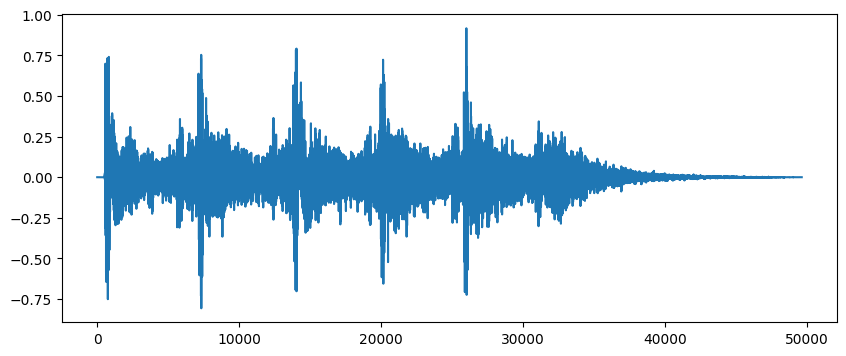

In [5]:
single_file='UrbanSound8K/7061-6-0-0.wav'
single_audio_data, single_sample_rate = librosa.load(single_file)
plt.figure(figsize= (10,4))
plt.plot(single_audio_data)
single_audio_data


In [6]:
mfccs = librosa.feature.mfcc(y=single_audio_data, sr=single_sample_rate, n_mfcc=30)
mfccs


array([[-1.2721312e+02,  8.0479183e+00,  1.6004406e+01, ...,
        -5.6935339e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020672e+01,  2.2940350e+01,  1.0669682e+01, ...,
         4.3051208e+01,  2.5888054e+01,  1.2829796e+01],
       [-2.5360188e+00, -1.1252436e+01, -1.4259802e+01, ...,
        -1.1103723e+01, -7.5506291e+00,  2.0151640e-01],
       ...,
       [ 8.3244973e-01,  6.4580121e+00,  8.2302589e+00, ...,
         1.3412111e+00,  3.0163527e+00,  2.3916154e+00],
       [-3.3346181e+00, -4.0068736e+00, -4.9921379e+00, ...,
         1.6214182e+00,  2.9552069e+00,  7.1556818e-01],
       [-5.4131812e-01, -5.4165154e+00, -5.7393866e+00, ...,
         1.1928691e+00, -1.1564658e+00, -3.4050303e+00]], dtype=float32)

In [11]:
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [15]:
def features(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfcc_coefficient = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfcc_coefficient.T,axis=0)

    return mfccs_scaled

In [16]:
extracted_array=[]
for index,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_labels=row["class"]
    data=features(file_name)
    extracted_array.append([data,final_labels])

0it [00:00, ?it/s]


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")

In [8]:
extracted_mfcc_df = pd.DataFrame(extracted_array,columns=['feature','class'])
extracted_mfcc_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [9]:
X=np.array(extracted_mfcc_df['feature'].tolist())
y=np.array(extracted_mfcc_df['class'].tolist())

In [10]:
X


array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
        -1.6930529e+00, -6.1698407e-01,  3.8600534e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489316e-01, -5.4468727e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962967e+00, -9.6140957e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170296e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082441e+00, -1.6414585e+00,  5.6668444e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386460e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [11]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [12]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [13]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
X_train

# len(X_train), len(X_test)



array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [17]:
num_labels = 10

In [18]:
model=Sequential()
# 1. hidden layer
model.add(Dense(125,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 2. hidden layer
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 3. hidden layer
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Metal device set to: Apple M1


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               5125      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               3

In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
epochscount = 100
num_batch_size = 64
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=epochscount, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


2023-06-02 15:24:39.469427: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


110/110 [==============================] - 2s 15ms/step - loss: 9.7686 - accuracy: 0.1735 - val_loss: 2.0930 - val_accuracy: 0.2347
Epoch 2/100
110/110 [==============================] - 1s 13ms/step - loss: 2.8895 - accuracy: 0.2252 - val_loss: 2.1888 - val_accuracy: 0.2072
Epoch 3/100
110/110 [==============================] - 1s 12ms/step - loss: 2.3202 - accuracy: 0.2455 - val_loss: 2.1665 - val_accuracy: 0.1963
Epoch 4/100
110/110 [==============================] - 1s 12ms/step - loss: 2.0937 - accuracy: 0.2726 - val_loss: 2.1050 - val_accuracy: 0.2335
Epoch 5/100
110/110 [==============================] - 1s 12ms/step - loss: 2.0012 - accuracy: 0.3005 - val_loss: 2.0708 - val_accuracy: 0.2610
Epoch 6/100
110/110 [==============================] - 1s 13ms/step - loss: 1.9128 - accuracy: 0.3264 - val_loss: 2.0124 - val_accuracy: 0.2816
Epoch 7/100
110/110 [==============================] - 1s 13ms/step - loss: 1.8623 - accuracy: 0.3382 - val_loss: 1.9505 - val_accuracy: 0.3641
Epoc

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               5125      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               3

In [23]:
validation_test_set_accuracy = model.evaluate(X_test,y_test,verbose=0)
validation_test_set_accuracy[1]


0.8139668107032776

In [24]:
model.predict(X_test)


55/55 [==============================] - 0s 2ms/step


array([[1.96605924e-06, 2.76273640e-05, 7.89979647e-04, ...,
        4.39743744e-08, 1.08304128e-04, 9.58054326e-04],
       [1.14690490e-09, 1.56402393e-07, 1.22598931e-01, ...,
        1.14867825e-20, 1.70493673e-04, 7.35672347e-06],
       [4.95591885e-05, 1.29960673e-02, 2.29245145e-03, ...,
        4.39581722e-02, 2.69920973e-04, 2.99685821e-02],
       ...,
       [8.53095457e-07, 9.79658484e-01, 1.18052762e-04, ...,
        3.52960285e-07, 1.19066463e-05, 1.58334654e-02],
       [2.11624816e-01, 5.58791077e-03, 4.05313492e-01, ...,
        2.93854857e-03, 7.47662736e-03, 2.66669571e-01],
       [1.62505925e-01, 1.91591773e-02, 2.21593380e-01, ...,
        4.27022250e-03, 1.93606094e-02, 2.02256680e-01]], dtype=float32)

Text(0.5, 1.0, 'model accuracy')

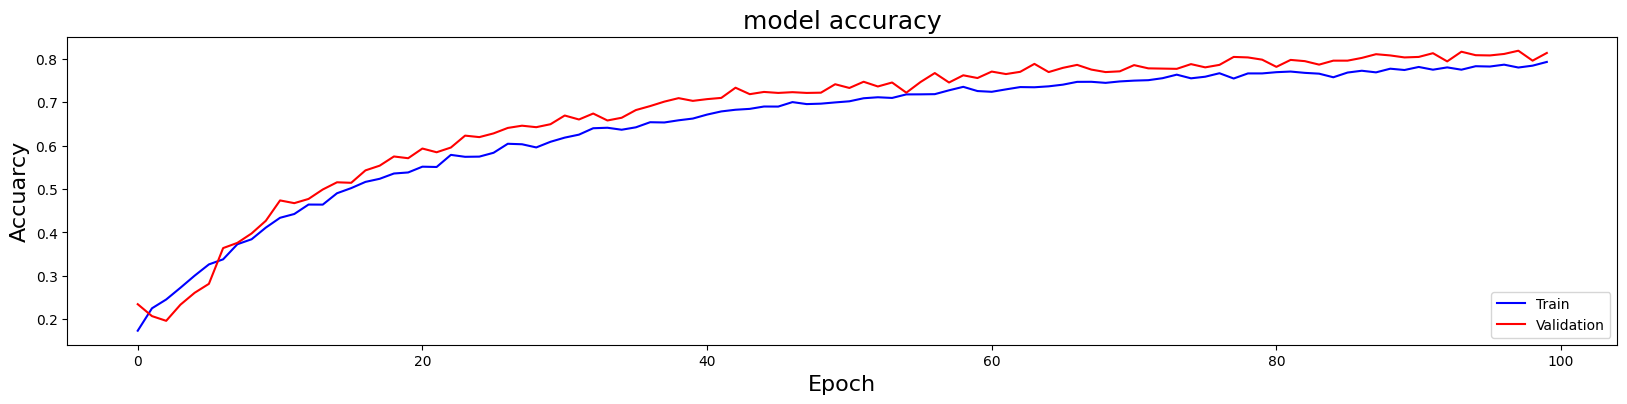

In [25]:
plt.figure(figsize= ( 20,4))
plt.plot(history.history['accuracy'], color = 'blue', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'r', label = 'Validation')
plt.legend (loc = 'lower right')
plt.xlabel('Epoch', size = 16)
plt.ylabel('Accuarcy', size = 16)
plt.title('model accuracy', size = 18)

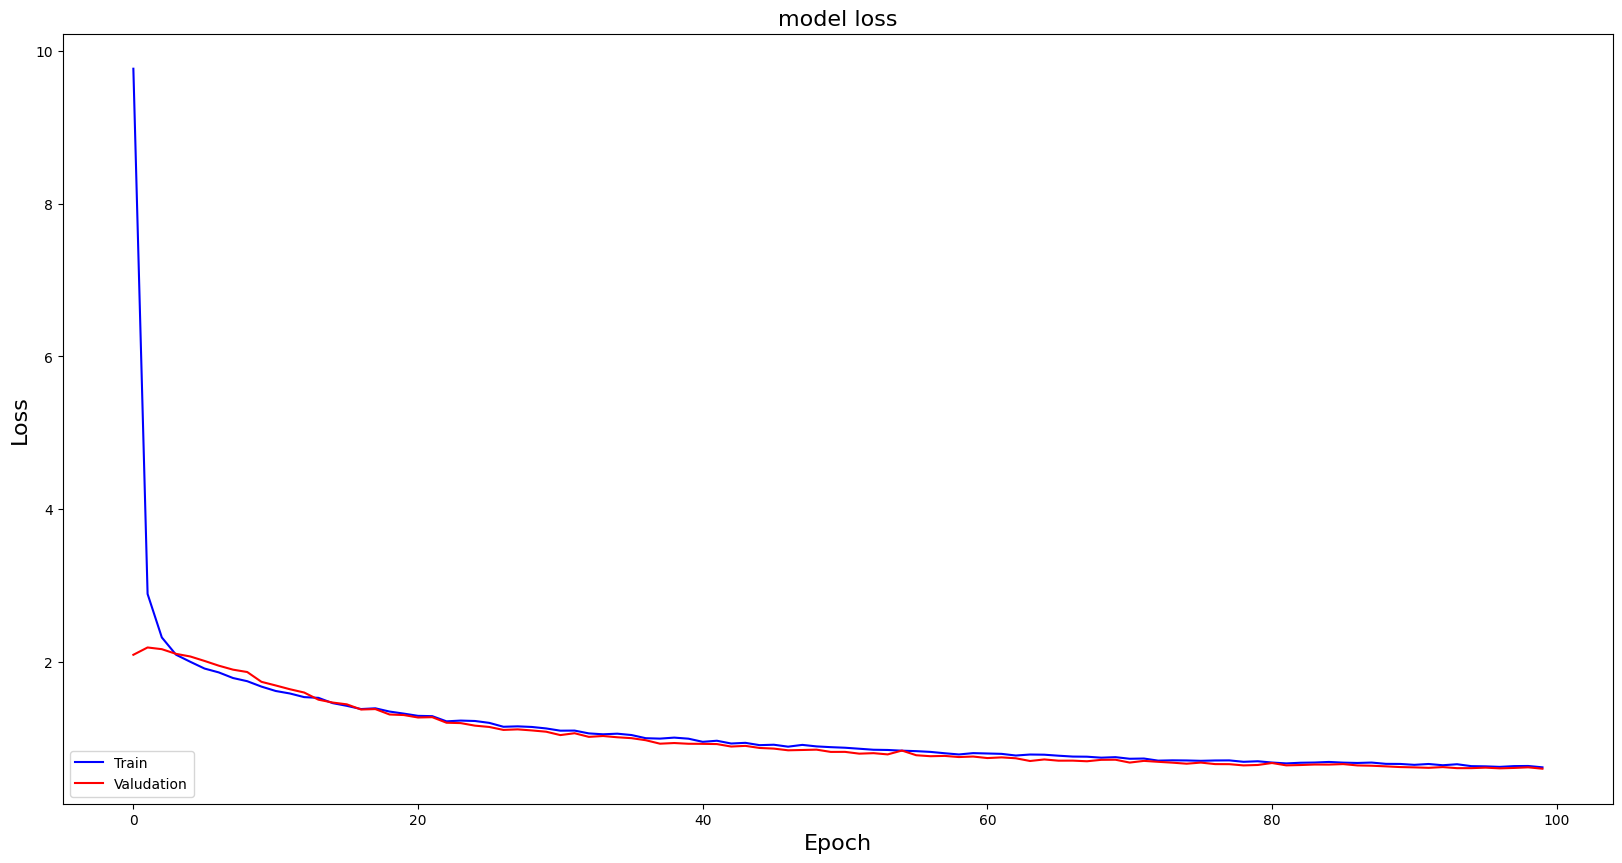

In [26]:
plt.figure(figsize= (20,10))
plt.plot(history.history['loss'], color = 'b', label = 'Train')
plt.plot(history.history['val_loss'], color = 'r', label = 'Valudation')
plt.legend(loc = 'lower left')
plt.xlabel('Epoch', size = 16)
plt.ylabel('Loss', size = 16)
plt.title('model loss', size = 16)
plt.show()


In [27]:
filename="UrbanSound8K/PoliceSiren.wav"
ses_signal, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfcc_coefficient = librosa.feature.mfcc(y=ses_signal, sr=sample_rate, n_mfcc=30)
mfccs_scaled = np.mean(mfcc_coefficient.T,axis=0)

In [28]:
print(mfccs_scaled)

[-5.0995752e+02  5.8146946e+01 -2.6707426e+01 -1.7372311e+01
 -2.8753526e+00  1.1949612e+01  3.4049835e+01  2.4762629e+01
  4.6244884e+00  3.2123772e-03  4.9547729e+00  1.8490025e+00
 -1.0731525e+01 -1.1760646e+01 -9.5060568e+00 -1.4619814e+01
 -1.1907404e+01 -7.1366186e+00 -6.3352227e+00 -2.0210274e-01
  1.8496815e+00 -4.4661732e+00 -6.6702261e+00 -4.1697803e+00
 -8.3460444e-01  1.0379702e+00 -1.6958172e+00 -3.1239166e+00
  6.9476914e-01  4.1810641e+00  6.1519116e-01 -7.5993414e+00
 -7.3442678e+00 -1.6432670e+00 -1.6267995e+00 -1.0078022e+00
 -7.9470462e-01 -3.7893722e+00 -2.6085303e+00 -2.7019658e+00]


In [29]:
mfccs_scaled = mfccs_scaled.reshape(1,-1)

In [30]:
result_array = model.predict(mfccs_scaled)

1/1 [==============================] - 0s 37ms/step


In [31]:
result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

result = np.argmax(result_array[0])
print(result_classes[result])

siren


In [42]:
model.save('save_model.h5')


In [58]:
from keras.saving.saving_api import load_model

new_model = load_model('save_model.h5')

1/1 [==============================] - 0s 14ms/step


array([[0.01575042, 0.0091273 , 0.5220281 , 0.14446543, 0.04367106,
        0.01488311, 0.06296089, 0.00071042, 0.11598523, 0.0704181 ]],
      dtype=float32)

'children_playing'

In [ ]:
# from tensorflow.keras.models import save_model

# save_model(model, "ses_model.h5")

# model.save('save_model.h5')

In [ ]:
from keras.saving.saving_api import load_model

new_model = load_model('save_model.h5')

In [ ]:
filename = "UrbanSound8K/dog-barking.wav"
ses_signal, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfcc_coefficient = librosa.feature.mfcc(y=ses_signal, sr=sample_rate, n_mfcc=40)
mfccs_scaled = np.mean(mfcc_coefficient.T, axis=0)
mfccs_scaled = mfccs_scaled.reshape(1,-1)



result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]





In [ ]:
dizi = new_model.predict(mfccs_scaled)

In [ ]:
dizi

In [ ]:
result_classes[np.argmax(dizi[0])]